# NCAR CESM High Resolution Ocean Simulation

In this notebook, we load and analyze data described in the following paper:

Small, R. J., et al. (2014), _A new synoptic scale resolving global climate simulation using the Community Earth System Model_, J. Adv. Model. Earth Syst., 6, 1065–1094.
<https://doi.org/10.1002/2014MS000363>

In [3]:
import xarray as xr
import numpy as np
import xgcm
import gcsfs
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (14,8)
%matplotlib inline

### Load High Resolution Ocean Surface Fields in Zarr Format

Catalog listing is at <https://pangeo-data.github.io/pangeo-datastore/master/ocean/cesm_pop.html>

In [4]:
#import intake
#cat = intake.Catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/CESM_POP.yaml")
#ds = cat["CESM_POP_hires_control"].to_dask()
#ds
import intake
cat = intake.Catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/atmosphere.yaml")
cat

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['geojson', 'postgis', 'shapefile', 'spatialite'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


<Intake catalog: atmosphere>

In [5]:
ds = cat["era5_hourly_reanalysis_single_levels_sa"].to_dask()
ds=ds[["u10", "v10"]]
ds


<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 350640)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * time       (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-09-20 05:15:01 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

In [6]:
ds100=ds.isel(time=slice(0, 100))

In [7]:
ds100.time

<xarray.DataArray 'time' (time: 100)>
array(['1979-01-01T00:00:00.000000000', '1979-01-01T01:00:00.000000000',
       '1979-01-01T02:00:00.000000000', '1979-01-01T03:00:00.000000000',
       '1979-01-01T04:00:00.000000000', '1979-01-01T05:00:00.000000000',
       '1979-01-01T06:00:00.000000000', '1979-01-01T07:00:00.000000000',
       '1979-01-01T08:00:00.000000000', '1979-01-01T09:00:00.000000000',
       '1979-01-01T10:00:00.000000000', '1979-01-01T11:00:00.000000000',
       '1979-01-01T12:00:00.000000000', '1979-01-01T13:00:00.000000000',
       '1979-01-01T14:00:00.000000000', '1979-01-01T15:00:00.000000000',
       '1979-01-01T16:00:00.000000000', '1979-01-01T17:00:00.000000000',
       '1979-01-01T18:00:00.000000000', '1979-01-01T19:00:00.000000000',
       '1979-01-01T20:00:00.000000000', '1979-01-01T21:00:00.000000000',
       '1979-01-01T22:00:00.000000000', '1979-01-01T23:00:00.000000000',
       '1979-01-02T00:00:00.000000000', '1979-01-02T01:00:00.000000000',
       '1979-01-02T02:00:00.000000000', '1979-01-02T03:00:00.000000000',
       '1979-01-02T04:00:00.000000000', '1979-01-02T05:00:00.000000000',
       '1979-01-02T06:00:00.000000000', '1979-01-02T07:00:00.000000000',
       '1979-01-02T08:00:00.000000000', '1979-01-02T09:00:00.000000000',
       '1979-01-02T10:00:00.000000000', '1979-01-02T11:00:00.000000000',
       '1979-01-02T12:00:00.000000000', '1979-01-02T13:00:00.000000000',
       '1979-01-02T14:00:00.000000000', '1979-01-02T15:00:00.000000000',
       '1979-01-02T16:00:00.000000000', '1979-01-02T17:00:00.000000000',
       '1979-01-02T18:00:00.000000000', '1979-01-02T19:00:00.000000000',
       '1979-01-02T20:00:00.000000000', '1979-01-02T21:00:00.000000000',
       '1979-01-02T22:00:00.000000000', '1979-01-02T23:00:00.000000000',
       '1979-01-03T00:00:00.000000000', '1979-01-03T01:00:00.000000000',
       '1979-01-03T02:00:00.000000000', '1979-01-03T03:00:00.000000000',
       '1979-01-03T04:00:00.000000000', '1979-01-03T05:00:00.000000000',
       '1979-01-03T06:00:00.000000000', '1979-01-03T07:00:00.000000000',
       '1979-01-03T08:00:00.000000000', '1979-01-03T09:00:00.000000000',
       '1979-01-03T10:00:00.000000000', '1979-01-03T11:00:00.000000000',
       '1979-01-03T12:00:00.000000000', '1979-01-03T13:00:00.000000000',
       '1979-01-03T14:00:00.000000000', '1979-01-03T15:00:00.000000000',
       '1979-01-03T16:00:00.000000000', '1979-01-03T17:00:00.000000000',
       '1979-01-03T18:00:00.000000000', '1979-01-03T19:00:00.000000000',
       '1979-01-03T20:00:00.000000000', '1979-01-03T21:00:00.000000000',
       '1979-01-03T22:00:00.000000000', '1979-01-03T23:00:00.000000000',
       '1979-01-04T00:00:00.000000000', '1979-01-04T01:00:00.000000000',
       '1979-01-04T02:00:00.000000000', '1979-01-04T03:00:00.000000000',
       '1979-01-04T04:00:00.000000000', '1979-01-04T05:00:00.000000000',
       '1979-01-04T06:00:00.000000000', '1979-01-04T07:00:00.000000000',
       '1979-01-04T08:00:00.000000000', '1979-01-04T09:00:00.000000000',
       '1979-01-04T10:00:00.000000000', '1979-01-04T11:00:00.000000000',
       '1979-01-04T12:00:00.000000000', '1979-01-04T13:00:00.000000000',
       '1979-01-04T14:00:00.000000000', '1979-01-04T15:00:00.000000000',
       '1979-01-04T16:00:00.000000000', '1979-01-04T17:00:00.000000000',
       '1979-01-04T18:00:00.000000000', '1979-01-04T19:00:00.000000000',
       '1979-01-04T20:00:00.000000000', '1979-01-04T21:00:00.000000000',
       '1979-01-04T22:00:00.000000000', '1979-01-04T23:00:00.000000000',
       '1979-01-05T00:00:00.000000000', '1979-01-05T01:00:00.000000000',
       '1979-01-05T02:00:00.000000000', '1979-01-05T03:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 ... 1979-01-05T03:00:00
Attributes:
    long_name:  time

In [8]:
dsday=ds100.resample(time='D').mean()
dsday

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 5)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 1979-01-05
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
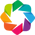

In [9]:
import xesmf as xe

import holoviews as hv
#hv.extension('matplotlib')
hv.extension("bokeh")

import geoviews as gv
import datashader as dsh
from holoviews.operation.datashader import rasterize

In [10]:
%%opts Image [width=800 height=450 clipping_colors={'NaN': (0,0,0,0)} colorbar=True]
tiles = gv.WMTS('https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg')

In [11]:
tiles * rasterize(gv.operation.project(gv.Dataset(ds100, ['time', 'longitude', 'latitude'], 'u10').to(gv.QuadMesh, ['longitude', 'latitude'])), precompute=True).options(cmap='YlOrRd', width=800, height=450, colorbar=True, clim=(ds100.u10.min().item(), ds100.u10.max().item()))


NotImplementedError: 'item' is not yet a valid method on dask arrays

In [18]:
u10min=ds100.u10.min().compute().item()

In [19]:
u10max=ds100.u10.max().compute().item()

In [20]:
u10min, u10max

(-32.30494689941406, 28.31720733642578)

In [21]:
tiles * rasterize(gv.operation.project(gv.Dataset(ds100, ['time', 'longitude', 'latitude'], 'u10').to(gv.QuadMesh, ['longitude', 'latitude'])), precompute=True).options(cmap='YlOrRd', width=800, height=450, colorbar=True, clim=(u10min, u10max))


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/function_base.py:1273: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/function_base.py:1273: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/function_base.py:1273: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


:DynamicMap   [time]
   :Overlay
      .WMTS.I  :WMTS   [Longitude,Latitude]
      .Image.I :Image   [longitude,latitude]   (u10)

In [22]:

tiles * rasterize(gv.operation.project(gv.Dataset(dsday, ['time', 'longitude', 'latitude'], 'u10').to(gv.QuadMesh, ['longitude', 'latitude'])), precompute=True).options(cmap='YlOrRd', width=800, height=450, colorbar=True, clim=(u10min, u10max))


ValueError: assignment destination is read-only

In [23]:
dsday

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 5)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 1979-01-05
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>

In [24]:
ds100

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 100)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * time       (time) datetime64[ns] 1979-01-01 ... 1979-01-05T03:00:00
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-09-20 05:15:01 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

In [13]:
grid_nw = (-14.483118595673256, 54.537018324045874)
grid_se = (-5.862852074773461, 51.188149462158464)


In [14]:
km_deg_res = 0.25
ireland_grid = xe.util.grid_2d(grid_nw[0], grid_se[0], km_deg_res,
                               grid_se[1], grid_nw[1], km_deg_res)
ireland_grid


<xarray.Dataset>
Dimensions:  (x: 35, x_b: 36, y: 14, y_b: 15)
Coordinates:
    lon      (y, x) float64 -14.36 -14.11 -13.86 -13.61 ... -6.358 -6.108 -5.858
    lat      (y, x) float64 51.31 51.31 51.31 51.31 ... 54.56 54.56 54.56 54.56
    lon_b    (y_b, x_b) float64 -14.48 -14.23 -13.98 ... -6.233 -5.983 -5.733
    lat_b    (y_b, x_b) float64 51.19 51.19 51.19 51.19 ... 54.69 54.69 54.69
Dimensions without coordinates: x, x_b, y, y_b
Data variables:
    *empty*

### Transform POP Model Dimensions

The POP models uses the same dimensions (`nlat`, `nlon`) to describe all data variables,
despite the fact that these variables live at different points on the grid cell (T point vs. U point).
The true positions of the variables are encoded in the attribute `grid_loc`:

    grid_loc 1: dimensionality
    grid_loc 2: horizontal location in x: 1 = TLONG; 2 = ULONG
    grid_loc 3: horizontal location in y: 1 = TLAT; 2 = ULAT
    grid_loc 4: vertical grid: 0 = surface, 1 = z_t, 2 = z_w, 3 = z_w_bot, 4 = z_t_150m

This choice is not optimal for using xarray and [xgcm](http://xgcm.readthedocs.org/),
since it implies that those variables can be directly added / multiplied, etc.
So we need to modify the dataset to fix this, by parsing `grid_loc` and introducing new coordinates
(`nlat_u`, `nlat_t`, `nlon_u`, `nlon_t`).

That's what the code below does. These routines are also archived in a standalone gist:
<https://gist.github.com/rabernat/933bc785c99828352f343e48d0da6e22>


In [ ]:
def dims_from_grid_loc(grid_loc):
    grid_loc = str(grid_loc)
    ndim = int(grid_loc[0])
    x_loc_key = int(grid_loc[1])
    y_loc_key = int(grid_loc[2])
    z_loc_key = int(grid_loc[3])
    
    x_loc = {1: 'nlon_t', 2: 'nlon_u'}[x_loc_key]
    y_loc = {1: 'nlat_t', 2: 'nlat_u'}[y_loc_key]
    z_loc = {0: 'surface', 1: 'z_t', 2: 'z_w', 3: 'z_w_bot', 4: 'z_t_150m'}[z_loc_key]
    
    if ndim == 3:
        return z_loc, y_loc, x_loc
    elif ndim == 2:
        return y_loc, x_loc

In [ ]:
def label_coord_grid_locs(ds):
    grid_locs = {'ANGLE': '2220', 'ANGLET': '2110',
                 'DXT': '2110', 'DXU': '2220',
                 'DYT': '2110', 'DYU': '2220',
                 'HT': '2110', 'HU': '2220',
                 'HTE': '2210', 'HTN': '2120',
                 'HUS': '2210', 'HUW': '2120',
                 'KMT': '2110', 'KMU': '2220',
                 'REGION_MASK': '2110',
                 'TAREA': '2110', 'TLAT': '2110', 'TLONG': '2110',
                 'UAREA': '2220', 'ULAT': '2220', 'ULONG': '2220'}
    ds_new = ds.copy()
    for vname, grid_loc in grid_locs.items():
        ds_new[vname].attrs['grid_loc'] = grid_loc
    return ds_new

In [ ]:
# create some actual dimension coordinates
def add_pop_dims_to_dataset(ds):
    ds_new = ds.copy()
    ds_new['nlon_u'] = xr.Variable(('nlon_u'), np.arange(len(ds.nlon)) + 1, {'axis': 'X', 'c_grid_axis_shift': 0.5})
    ds_new['nlat_u'] = xr.Variable(('nlat_u'), np.arange(len(ds.nlat)) + 1, {'axis': 'Y', 'c_grid_axis_shift': 0.5})
    ds_new['nlon_t'] = xr.Variable(('nlon_t'), np.arange(len(ds.nlon)) + 0.5, {'axis': 'X'})
    ds_new['nlat_t'] = xr.Variable(('nlat_t'), np.arange(len(ds.nlat)) + 0.5, {'axis': 'Y'})
    
    # add metadata to z grid
    ds_new['z_t'].attrs.update({'axis': 'Z'})
    ds_new['z_w'].attrs.update({'axis': 'Z', 'c_grid_axis_shift': -0.5})
    ds_new['z_w_top'].attrs.update({'axis': 'Z', 'c_grid_axis_shift': -0.5})
    ds_new['z_w_bot'].attrs.update({'axis': 'Z', 'c_grid_axis_shift': 0.5})
    
    return ds_new

In [ ]:
def relabel_pop_dims(ds):
    ds_new = label_coord_grid_locs(ds)
    ds_new = add_pop_dims_to_dataset(ds_new)
    for vname in ds_new.variables:
        if 'grid_loc' in ds_new[vname].attrs:
            da = ds_new[vname]
            dims_orig = da.dims
            new_spatial_dims = dims_from_grid_loc(da.attrs['grid_loc'])
            if dims_orig[0] == 'time':
                dims = ('time',) + new_spatial_dims
            else:
                dims = new_spatial_dims
            ds_new[vname] = xr.Variable(dims, da.data, da.attrs, da.encoding, fastpath=True)
    return ds_new

In [ ]:
ds_new = relabel_pop_dims(ds)
ds_new

### Create and XGCM Grid object to manipulate the data

In [ ]:
grid = xgcm.Grid(ds_new, periodic=['X'])
grid

In [ ]:
# here we strip the coordinates out of the dataset
# this makes the calculation below work better
ds_coords = ds_new.coords.to_dataset().reset_coords().drop('time')
ds_raw = ds_new.reset_coords(drop=True)

### Calculate Vorticity

We now use xgcm to calculate vorticity using the B-grid discretization described in the POP manual.

$$ \zeta = \frac{1}{\Delta_y} \delta_x \overline{\Delta_y u_y}^y -  
           \frac{1}{\Delta_x} \delta_y \overline{\Delta_x u_x}^x $$
           
This all happens lazily (no data is actually loaded yet).

In [ ]:
zeta = ( grid.diff(grid.interp(ds_raw.V1_1 * ds_coords.DYU, 'Y', boundary='extend'), 'X')
       - grid.diff(grid.interp(ds_raw.U1_1 * ds_coords.DXU, 'X'), 'Y', boundary='fill') ) / ds_coords.TAREA
zeta

In [ ]:
# Note: this calculation creates over a million dask chunks
len(zeta.data.dask)

### Plot a Vorticity Snapshot

First we use the standard matplotlib approach.

In [ ]:
zeta[0].load().plot(vmax=1e-4, figsize=(15,8))

The data is too high-resolution to visualize that way. We are aliasing fine structure

### Visualize with Holoviews and Datashader

Here we create an interactive browser for the data that dynamically resamples the image resolution as we zoom in and out.

In [ ]:
import holoviews as hv
import datashader
from holoviews.operation.datashader import regrid, shade, datashade
hv.extension('bokeh', width=100)

In [ ]:
hv_ds = hv.Dataset(zeta.rename('zeta'))
im = hv_ds.to(hv.Image, kdims=["nlon_t", "nlat_t"], dynamic=True).redim.range(zeta=(-3e-5, 3e-5))

In [ ]:
%%opts Image [width=800 height=400 colorbar=True] (cmap='RdBu_r')

regrid(im)

### Vorticity Histogram with Dask

Let's calculate the PDF of vorticity for many timesteps.

First we create a dask cluster

In [ ]:
from dask.distributed import Client
from dask_kubernetes import KubeCluster
cluster = KubeCluster()
cluster.adapt(minimum=1, maximum=20)
cluster

(👆don't forget to look at the dashboard!)

...and connect to it

In [ ]:
client = Client(cluster)
client

Because xarray doesn't have out-of-core histogram capability, we operate directly on the lower level dask arrays.

In [ ]:
import dask.array as dsa

In [ ]:
ntimesteps = 600
h, bins = dsa.histogram(zeta[:ntimesteps].fillna(0.).data, bins=101, range=(-2e-3, 2e-3))
hc = h.persist()

In [ ]:
plt.bar(bins[:-1], np.log10(hc), width=(bins[1]-bins[0]))